

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [201]:
import pandas as pd
import random
import numpy as np
from scipy import stats
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])
from scipy.stats import shapiro
stat, p = shapiro(GPU1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
stat1, p1 = shapiro(GPU2)
print('Statistics=%.3f, p=%.3f' % (stat1, p1))
from scipy.stats import ttest_ind
ttest = ttest_ind(GPU1, GPU2, equal_var=True)
ttest

Statistics=0.854, p=0.020
Statistics=0.917, p=0.175


Ttest_indResult(statistic=array([-2.62762951]), pvalue=array([0.01379428]))

In [202]:
print("P value is less than alpha(0.05), so we need to reject NUll Hypothesis")




P value is less than alpha(0.05), so we need to reject NUll Hypothesis


[## Question 2 
](https://)
He is trying a third GPU which is GPU3.

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [203]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])
N1 = len(GPU1)
N2 = len(GPU2)
df = (N1 + N2 - 2)
std1 = GPU1.std()
std2 = GPU2.std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

diff_mean = GPU2.mean() - GPU1.mean()
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

#print("diff_mean:", diff_mean)
#print("diff_mean - MoE:", diff_mean - MoE)
#print("diff_mean + MoE:" ,diff_mean + MoE)

from scipy.stats import ttest_ind
ttest = ttest_ind(GPU1, GPU3, equal_var=True)
print(ttest)
print("P value is greater than alpha(0.05), so we need to accept NUll Hypothesis")



#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

Ttest_indResult(statistic=array([-1.49889438]), pvalue=array([0.14509211]))
P value is greater than alpha(0.05), so we need to accept NUll Hypothesis


### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [204]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])


Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [207]:
from scipy.stats import levene
levene(e1, e2,e3)
from scipy.stats import f_oneway
 
F, p = f_oneway(e1, e2, e3  )
print(F)
print(p)
print("P value is greater than alpha(0.05), so we need to accept NUll Hypothesis")

[2.51357623]
[0.13574645]
P value is greater than alpha(0.05), so we need to accept NUll Hypothesis


## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [ ]:
A type I error is the rejection of a true null hypothesis (also known as a "false positive" finding)

In [ ]:
A type II error is failing to reject a false null hypothesis (also known as a "false negative" finding).

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [ ]:
NUll Hypothesis: Waiting time to place an order has not changed in the past month 
                 from its previous population mean value of 4.5 minutes

In [ ]:
Alternate Hypothesis:Waiting time to place an order has changed in the past month 
                     from its previous population mean value of 4.5 minutes

# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [210]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import scipy

[5.90490000e-06 1.37781000e-04 1.44670050e-03 9.00169200e-03
 3.67569090e-02 1.02919345e-01 2.00120949e-01 2.66827932e-01]


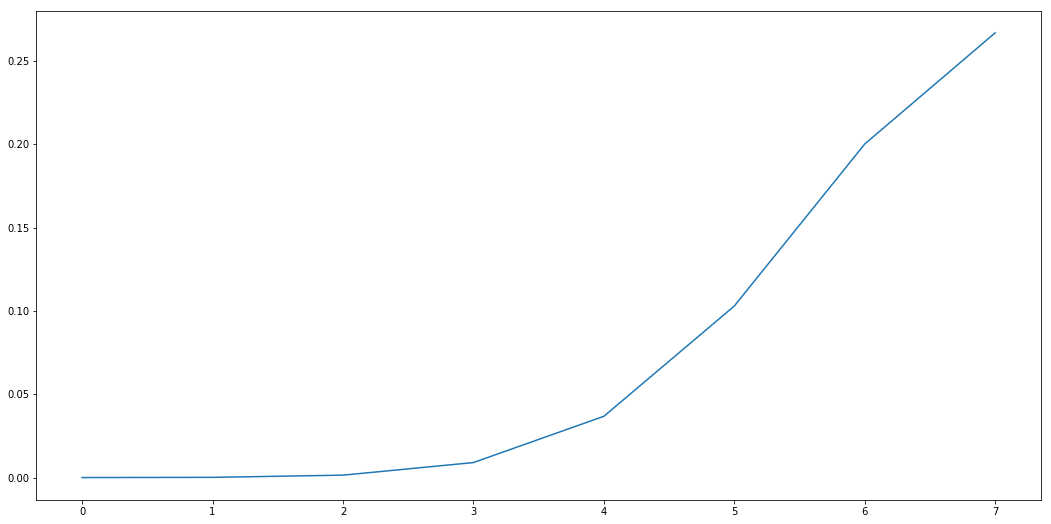

In [211]:
n = 10
p = 0.7
k = [0, 1, 2, 3, 4, 5, 6, 7]
binomial = scipy.stats.binom.pmf(k,n,p)
print(binomial)
import pylab
pylab.plot(binomial)

In [212]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
NNH = KNeighborsClassifier(n_neighbors= 5 )
bc_df = pd.read_csv("Iris.csv",names = ["SepalLength", "SepalWidth", "PetalLenght", "PetalWidth","Type"])
bc_df.shape
bc_df.sample(n=10)

,SepalLength,SepalWidth,PetalLenght,PetalWidth,Type
91,6.1,3.0,4.6,1.4,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor
27,5.2,3.5,1.5,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [214]:
bc_df.fillna(bc_df.median())

,SepalLength,SepalWidth,PetalLenght,PetalWidth,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [215]:
bc_df.dtypes
bc_df.head(2)
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
bc_df['Type'] = number.fit_transform(bc_df['Type']).astype('str')
bc_df.head(2)
bc_df.groupby("Type").count()


,SepalLength,SepalWidth,PetalLenght,PetalWidth
Type,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


## Question 4

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [219]:
print(bc_df.describe())
print("As the Standard Deviation is not near to 0 for all columns, So Variance is greater than 0.1, so we can not drop the column")

       SepalLength  SepalWidth  PetalLenght  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000
As the Standard Deviation is not near to 0 for all columns, So Variance is greater than 0.1, so we can not drop the column


## Question 5

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FA41B70>,
      dtype=object)

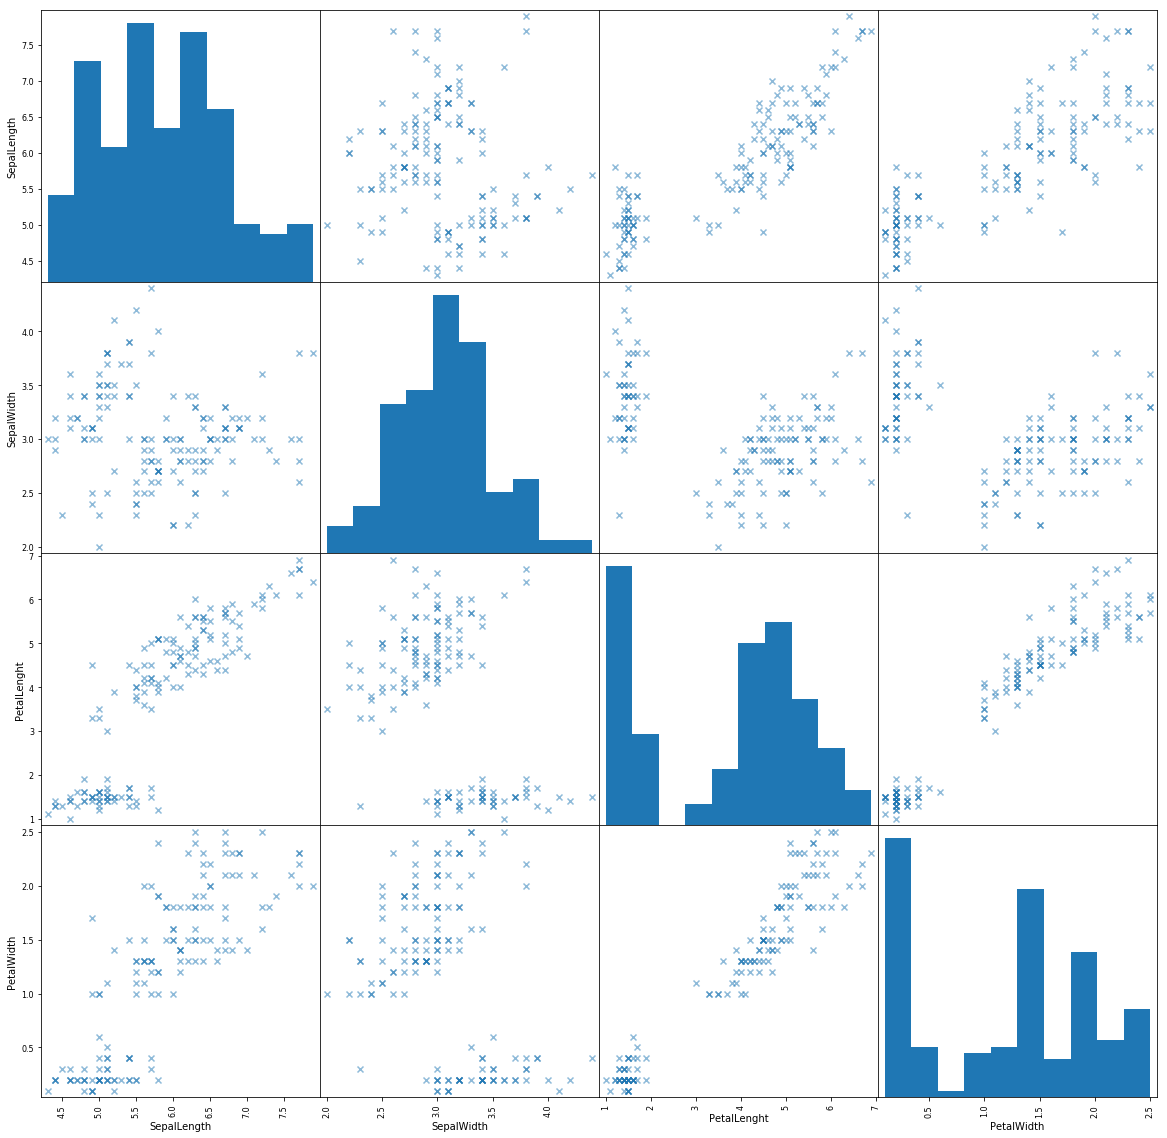

In [220]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
colors=['red','green']
scatter_matrix(bc_df,figsize=[20,20],marker='x')

## Question 6 - Model

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [221]:
bc_labels = bc_df["Type"]
bc_feature_df = bc_df.drop(labels= "Type" , axis = 1)

In [222]:

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

bc_feature_df_z.describe()

,SepalLength,SepalWidth,PetalLenght,PetalWidth
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [223]:
X = np.array(bc_feature_df_z)
X.shape

(150, 4)

In [224]:
y = np.array(bc_labels)
y.shape

(150,)

In [225]:

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [226]:
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [227]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [228]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [229]:
y_predict = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9555555555555556

In [230]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

myList =[3,5,9]


# empty list that will hold cv scores
cv_scores1 = []
k_neighbors1 = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores1.append(scores.mean())
    k_neighbors1.append(k)


MSE = [1 - x for x in cv_scores1]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 5


## Question 7 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [231]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 5


Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 8

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

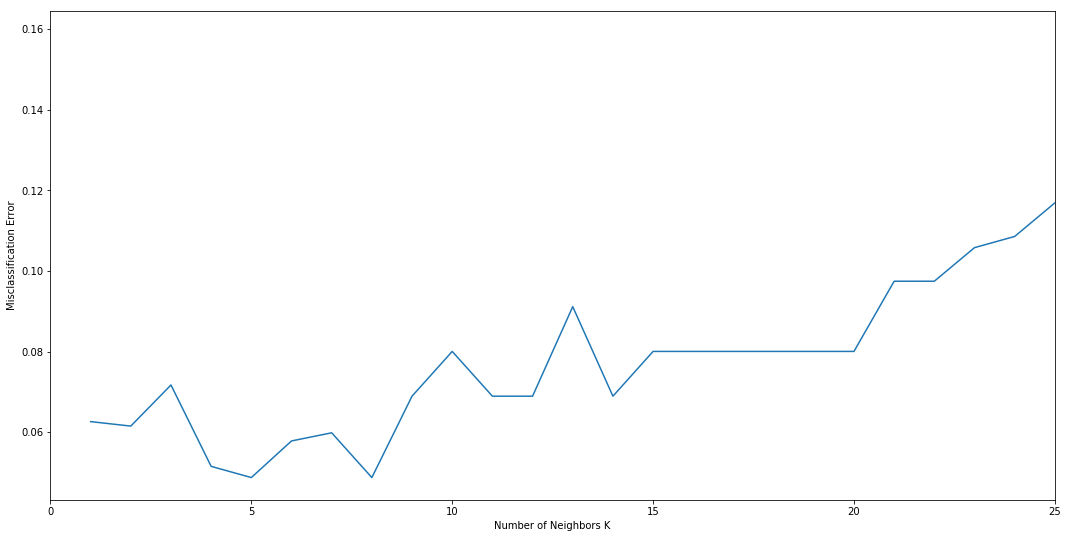

In [232]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()